# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type

# urban_ride_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# suburban_ride_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

# rural_ride_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


# urban_ride_count =urban_ride_df.groupby("city").count()["ride_id"]
# suburban_ride_count =suburban_ride_df.groupby("city").count()["ride_id"]
# rural_ride_count =rural_ride_df.groupby("city").count()["ride_id"]

# suburban_ride_count

# urban_ride_total = urban_ride_count.sum()
# suburban_ride_total = suburban_ride_count.sum()
# rural_ride_total = rural_ride_count.sum()


# print(urban_ride_total, suburban_ride_count, rural_ride_count)


total_rides = pyber_data_df.groupby("type").count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type

# urban_driver_count = urban_ride_df.groupby("city").sum()["driver_count"]
# suburban_driver_count = suburban_ride_df.groupby("city").sum()["driver_count"]
# rural_driver_count = rural_ride_df.groupby("city").sum()["driver_count"]

total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

total_driver_count


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type

total_fare_count = pyber_data_df.groupby("type").sum()["fare"]

total_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 

# urban_avg_fare_per_ride =  urban_fare_count/urban_ride_count
# suburban_avg_fare_per_ride = suburban_fare_count/suburban_ride_count
# rural_avg_fare_per_ride = rural_fare_count/rural_ride_count
# suburban_avg_fare_per_ride


average_fare_per_ride = total_fare_count/total_rides

average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 


# urban_avg_fare_per_driver =  urban_fare_count/urban_driver_count
# suburban_avg_fare_per_driver = suburban_fare_count/suburban_driver_count
# rural_avg_fare_per_driver = rural_fare_count/rural_driver_count
# suburban_avg_fare_per_driver

average_fare_per_driver = total_fare_count/total_driver_count

average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 

type_rides = ["Rural", "Suburban","Rural"]

pyber_summary_df = pd.DataFrame({ 
    "Total Rides": total_rides, 
    "Total Drivers":total_driver_count,  
    "Total Fares": total_fare_count, 
    "Average Fare per Ride": average_fare_per_ride, 
    "Average Fare per Driver": average_fare_per_driver
    
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4256850000000,4,Rural


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_line_chart_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

pyber_data_line_chart_df


fare
type  date                
Rural 1/1/19 9:45    43.69
      1/11/19 4:39   16.42
      1/14/19 15:58  54.10
      1/14/19 7:09   18.05
      1/15/19 21:44  30.26
...                    ...
Urban 5/8/19 1:54    32.69
      5/8/19 2:31    41.33
      5/8/19 4:20    21.99
      5/8/19 4:39    18.45
      5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pyber_data_line_chart_df = pyber_data_line_chart_df.reset_index()

pyber_data_line_chart_df

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


pyber_data_line_chart_df = pyber_data_line_chart_df.pivot(index = "date", columns = "type", values = "fare")

pyber_data_line_chart_df

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_data_new_pivot_table = pyber_data_line_chart_df.loc["1/1/19":"4/29/19"]

pyber_data_new_pivot_table

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
4/28/19 4:34,NaN,NaN,40.46
4/28/19 8:15,NaN,NaN,22.86
4/28/19 9:03,NaN,NaN,15.00


In [27]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_data_new_pivot_table.index = pd.to_datetime(pyber_data_new_pivot_table.index)
pyber_data_new_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [28]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_new_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [30]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pyber_data_df = pyber_data_new_pivot_table.resample("W").sum()

# new_pyber_data_suburban = pyber_data_new_pivot_table.resample("Q").sum()["Suburban"]

# new_pyber_data_rural = pyber_data_new_pivot_table.resample("Q").sum()["Rural"]

new_pyber_data_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


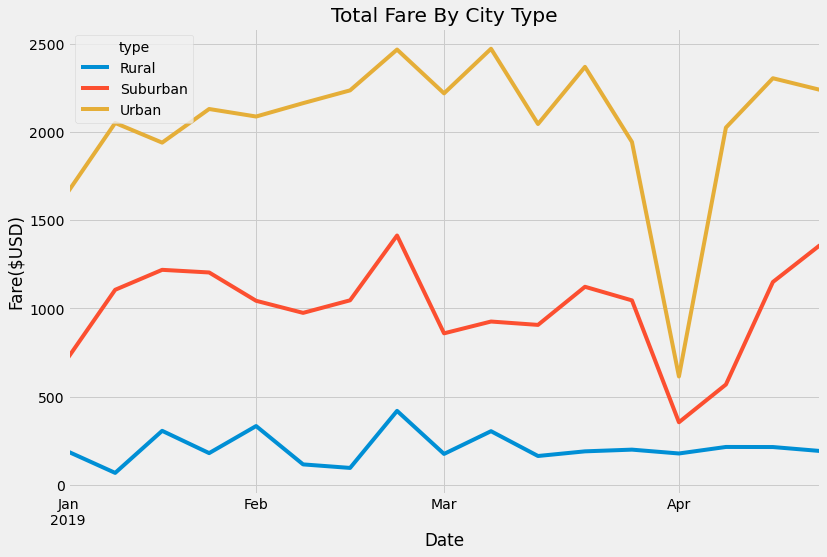

In [44]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
from matplotlib.pyplot import figure
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

new_pyber_data_df.plot.line(figsize = (12,8))

plt.xlabel("Date")
plt.ylabel("Fare($USD)")
plt.title("Total Fare By City Type")

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()

